In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
from the_well.benchmark.data.datasets import GenericWellMetadata, GenericWellDataset
from the_well.benchmark.data.data_formatter import DefaultChannelsFirstFormatter, DefaultChannelsLastFormatter
import numpy as np
import torch 
import matplotlib.pyplot as plt


In [5]:
ds = GenericWellDataset(well_base_path='/mnt/home/polymathic/ceph/the_well',
                        well_dataset_name='acoustic_scattering_maze_2d',
                        # include_filters=['MHDMa_0.7_Ms_0.7.hdf5'],
                        # use_normalization=False,
                        well_split_name='valid',
                        n_steps_input=4,)
metadata = ds.metadata
formatter = DefaultChannelsFirstFormatter(metadata)
# formatter = DefaultChannelsLastFormatter(metadata)

In [6]:
for i in range(len(ds)):
    print('\n',i)
    for k, v in ds[i].items():
        print(k, v.shape)


 0
input_fields torch.Size([4, 256, 256, 3])
output_fields torch.Size([1, 256, 256, 3])
constant_fields torch.Size([1, 256, 256, 2])
space_grid torch.Size([256, 256, 2])
input_time_grid torch.Size([4])
output_time_grid torch.Size([1])

 1
input_fields torch.Size([4, 256, 256, 3])
output_fields torch.Size([1, 256, 256, 3])
constant_fields torch.Size([1, 256, 256, 2])
space_grid torch.Size([256, 256, 2])
input_time_grid torch.Size([4])
output_time_grid torch.Size([1])

 2
input_fields torch.Size([4, 256, 256, 3])
output_fields torch.Size([1, 256, 256, 3])
constant_fields torch.Size([1, 256, 256, 2])
space_grid torch.Size([256, 256, 2])
input_time_grid torch.Size([4])
output_time_grid torch.Size([1])

 3
input_fields torch.Size([4, 256, 256, 3])
output_fields torch.Size([1, 256, 256, 3])
constant_fields torch.Size([1, 256, 256, 2])
space_grid torch.Size([256, 256, 2])
input_time_grid torch.Size([4])
output_time_grid torch.Size([1])

 4
input_fields torch.Size([4, 256, 256, 3])
output_fie

KeyboardInterrupt: 

In [ ]:
ds.files[0]['dimensions']['time'].attrs['sample_varying']

True

In [40]:
{k:v.shape for k, v in ds[0].items()}

{'input_fields': torch.Size([4, 1024, 256, 2]),
 'output_fields': torch.Size([1, 1024, 256, 2]),
 'constant_fields': torch.Size([50, 1024, 256, 1]),
 'constant_scalars': torch.Size([1]),
 'space_grid': torch.Size([1024, 256, 2]),
 'input_time_grid': torch.Size([4]),
 'output_time_grid': torch.Size([1])}

In [18]:
formatter.process_input({k: v.unsqueeze(0) for k, v in ds[0].items()})[0][0].shape

torch.Size([1, 12, 1024, 256])

In [34]:
list(ds.files[0]['t0_fields']['pressure_re'].attrs.items())

[('dim_varying', array([ True,  True])),
 ('sample_varying', True),
 ('time_varying', True)]

In [152]:
list(f['boundary_conditions']['x_periodic'].attrs.items())

[('associated_dims', array(['x'], dtype=object)),
 ('associated_fields', array([], dtype=float64)),
 ('bc_type', 'periodic'),
 ('sample_varying', False),
 ('time_varying', False)]

In [17]:
f = h5.File('/mnt/home/polymathic/ceph/the_well/datasets/MHD/data/train/MHDMa_0.7_Ms_0.7.hdf5', 'r')

In [106]:
x = f['t0_fields']['density'][0, 0]

In [165]:
def fourier_downsample(x, factor=1/8):
    """ Does resampling in Fourier space """
    H, W, D = x.shape[2:5]
    h, w, d = int(H*factor), int(W*factor), int(D*factor)
    xfft = np.fft.rfftn(x, axes=(2, 3, 4), norm='forward')
    xfft = np.fft.fftshift(xfft, axes=(2, 3))
    xfft = xfft[:, :, :, :, :d//2+1]
    xfft = xfft[:, :, :, W//2-w//2:W//2+w//2, :]
    xfft = xfft[:, :, H//2-h//2:H//2+h//2, :, :]
    xfft = np.fft.ifftshift(xfft, axes=(2, 3))
    out = np.fft.irfftn(xfft, axes=(2,3, 4), norm='forward')
    return out
    # mid
    # mid_fft[..., :min(H//2, h//2), :min(W//2+1, w//2+1)] =  xfft[..., :min(H//2, h//2), :min(W//2+1, w//2+1)]
    # mid_fft[..., -min(H//2, h//2):, :min(W//2+1, w//2+1)] = xfft[...,  -min(H//2, h//2):, :min(W//2+1, w//2+1)]
    # return torch.fft.irfft2(mid_fft, dim=(-2, -1), norm='ortho').to(dtype=dtype)*factor


In [166]:
# def fourier_resample(x, resample=.25):
#     xfft = torch.fft.rfftn(x,
#                          dim=(0, 1),
#                            norm='forward')
#     return torch.fft.irfftn(xfft, 
#                          s=(int(x.shape[0]*resample), 
#                             int(x.shape[1]*resample), 
#                             # int(x.shape[2])
#                             ),
#                               dim=(0, 1), norm='forward')


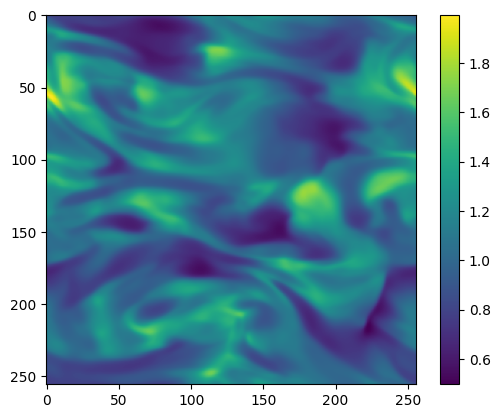

In [167]:
plt.imshow(x[0])
plt.colorbar()

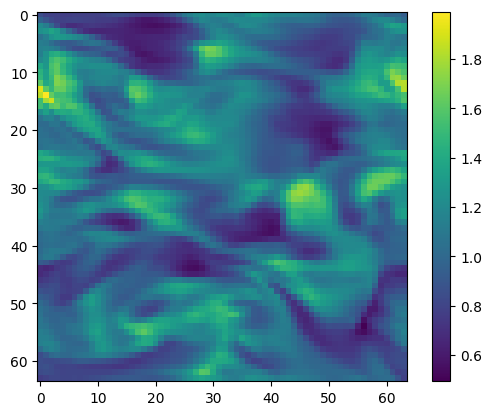

In [144]:
plt.imshow(fourier_downsample(x, .25)[0])
plt.colorbar()

In [51]:
x, y = formatter.process_input({k: v.unsqueeze(0) for k, v in ds[0].items()})

NameError: name 'formatter' is not defined

In [10]:
with 

torch.Size([1, 11, 256, 256])

In [4]:
import h5py as h5
import os
import numpy as np
import glob

def copy_subset(in_file, out_file, subset):
    for key in in_file.attrs.keys():
        if key == 'n_trajectories':
            out_file.attrs[key] = sum(subset)
        else:
            out_file.attrs[key] = in_file.attrs[key]
    if isinstance(in_file, h5.Group):
        for key in in_file.keys():
            if isinstance(in_file[key], h5.Group):
                out_subfile = out_file.create_group(key)
                in_subfile = in_file[key]
            elif isinstance(in_file[key], h5.Dataset):
                if 'sample_varying' in in_file[key].attrs and in_file[key].attrs['sample_varying']:
                    out_subfile = out_file.create_dataset(key, data=in_file[key][subset])
                else:
                    out_subfile = out_file.create_dataset(key, data=in_file[key])
                in_subfile = in_file[key]
            copy_subset(in_subfile, out_subfile, subset)

            
        

def split_hdf5_file(in_path, out_path):
    
    # Check if the folder containing "in_path" has train and test folders
    # If not, create them
    # folder = os.path.dirname(in_path)
    # base_object_name = in_path.split('/')[-1]
    # # Open the original file    
    with h5.File(in_path, 'r') as f:
        n_trajectories = f.attrs['n_trajectories']
        for i in range(n_trajectories):
            write_file = out_path.replace('.hdf5', f'_split{i}.hdf5')
            with h5.File(write_file, 'w') as out_f:
                assignments = np.zeros(n_trajectories)
                assignments[i] = 1
                copy_subset(f, out_f, assignments == 1)


subsets = ['train', 'valid', 'test']

base_in_path = '/mnt/home/polymathic/ceph/the_well/datasets/turbulent_radiative_layer_3D/data/'
base_out_path = '/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/'

base_string = 'turbulent_radiative_layer_3D'
new_string = 'split_turbulent_radiative_layer_3D'

for subset in subsets:
    in_path = base_in_path + subset
    out_path = base_out_path + subset
    os.makedirs(out_path, exist_ok=True)
    for fp in glob.glob(in_path + '/*.hdf5'):
        out_file = fp.replace(base_string, new_string, 1)
        split_hdf5_file(fp, out_file)
        # with h5.File(in_path + '/' + fp, 'r') as f:
        #     n_trajectories = f.attrs['n_trajectories']
        #     for i in range(n_trajectories):
        #         with h5.File(out_path + '/' + file, 'w') as out_f:
        #             assignments = np.zeros(n_trajectories)
        #             assignments[i] = 1
        #             copy_subset(f, out_f, assignments == 1)


/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_0.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_1.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_2.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_3.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_4.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_5.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_radiative_layer_3D/data/train/turbulent_radiative_layer_tcool_0.32_6.hdf5
/mnt/home/polymathic/ceph/the_well/datasets/split_turbulent_ra

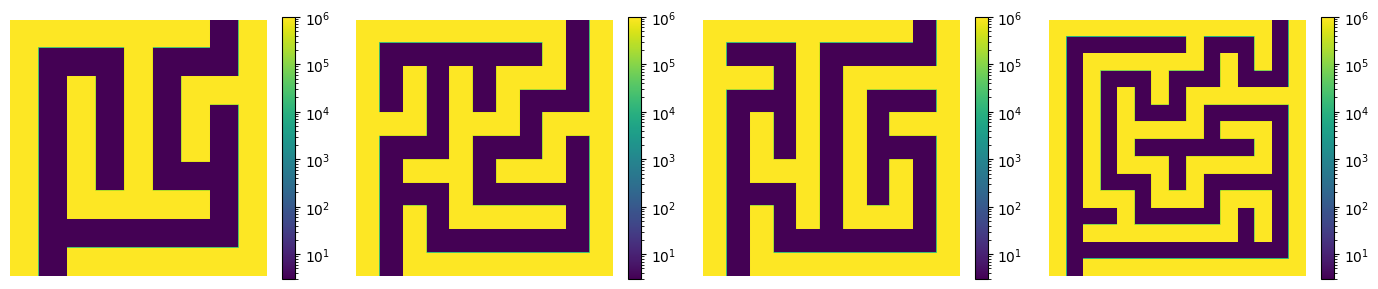

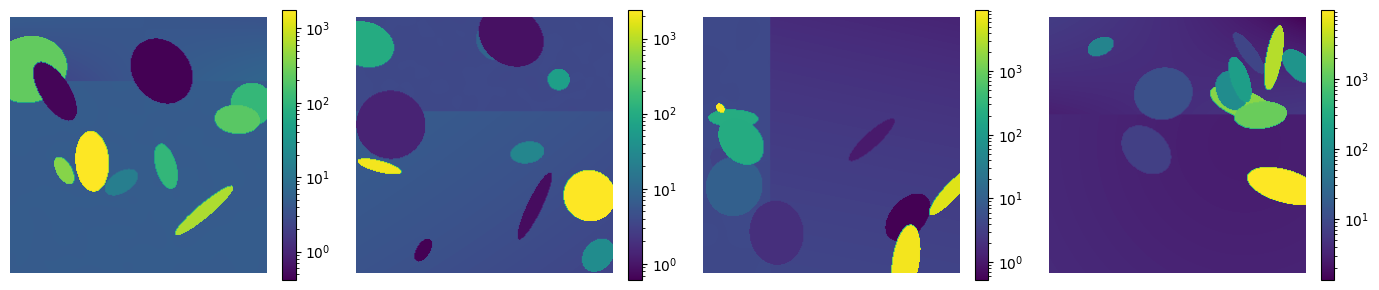

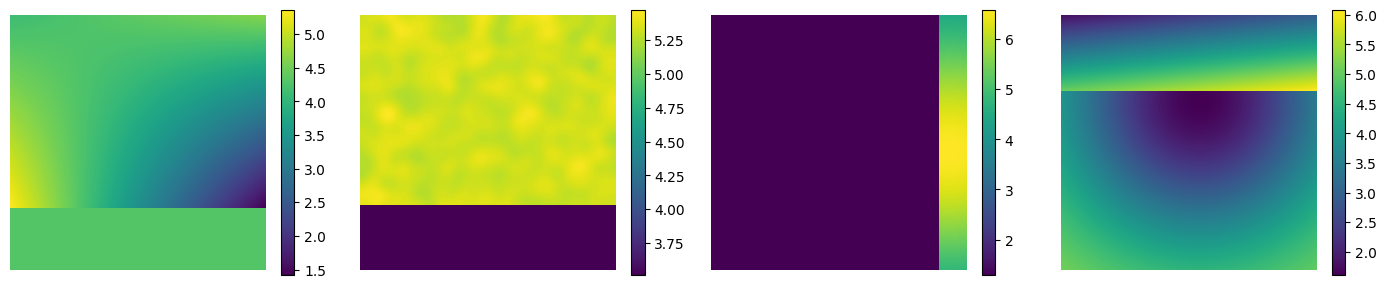

In [54]:
import h5py as h5
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

mazes = '/mnt/home/polymathic/ceph/the_well/datasets/acoustic_scattering_maze_2d/data/train/acoustic_scattering_maze_2d_chunk_2.hdf5'
inclusions = '/mnt/home/polymathic/ceph/the_well/datasets/acoustic_scattering_inclusions_2d/data/train/acoustic_scattering_inclusions_2d_chunk_2.hdf5'
discont = '/mnt/home/polymathic/ceph/the_well/datasets/acoustic_scattering_discontinuous_2d/data/train/acoustic_scattering_discontinuous_2d_chunk_2.hdf5'

for k, v in {'mazes': mazes,
             'inclusions': inclusions,
             'discontinuous': discont}.items():

    with h5.File(v, 'r') as f:
        n = 4
        fig, axes = plt.subplots(1, 4, figsize=(3.5*n, 3))
        for i, ax in enumerate(axes):
            norm = LogNorm() if k in ['mazes', 'inclusions'] else None
            curfig = ax.imshow(f['t0_fields']['density'][10+i], norm=norm)
            ax.axis('off')
            fig.colorbar(curfig, ax=ax)
        plt.tight_layout()
        plt.savefig(f'{k}_density.png', dpi=200)
        # print(k)

In [9]:
!ls /mnt/home/polymathic/ceph/the_well/datasets/

acoustic_scattering_discontinuous_2d  post_neutron_star_merger
acoustic_scattering_inclusions_2d     rayleigh_benard
acoustic_scattering_maze_2d	      rayleigh_taylor_instability
active_matter			      README.md
convective_envelope_rsg		      shear_flow
euler_quadrants			      supernova_explosion_128
helmholtz_staircase		      supernova_explosion_64
MHD_256				      turbulence_gravity_cooling
MHD_64				      turbulent_radiative_layer_2D
pattern_formation		      turbulent_radiative_layer_3D
planetswe			      viscoelastic_instability


In [5]:
import h5py as h5

with h5.File('/mnt/home/polymathic/ceph/the_well/datasets/planetswe/data/train/planetswe_IC00_s1.hdf5',
                'r') as f:
        print(f['dimensions']['theta'][:])

[3.1322172  3.120072   3.1078548  3.0956218  3.0833824  3.0711403
 3.0588963  3.0466514  3.0344057  3.0221596  3.0099132  2.9976664
 2.9854195  2.9731724  2.9609253  2.948678   2.9364307  2.9241834
 2.911936   2.8996885  2.887441   2.8751934  2.8629458  2.850698
 2.8384504  2.8262029  2.813955   2.8017073  2.7894597  2.777212
 2.764964   2.7527163  2.7404687  2.728221   2.7159731  2.7037253
 2.6914775  2.6792297  2.666982   2.6547341  2.6424863  2.6302385
 2.6179905  2.6057427  2.593495   2.581247   2.5689993  2.5567515
 2.5445035  2.5322556  2.5200078  2.50776    2.495512   2.4832642
 2.4710164  2.4587686  2.4465206  2.4342728  2.422025   2.409777
 2.3975291  2.3852813  2.3730335  2.3607855  2.3485377  2.33629
 2.3240418  2.311794   2.2995462  2.2872982  2.2750504  2.2628026
 2.2505546  2.2383068  2.2260587  2.213811   2.2015631  2.189315
 2.1770673  2.1648195  2.1525714  2.1403236  2.1280756  2.1158278
 2.10358    2.091332   2.0790842  2.0668364  2.0545883  2.0423405
 2.0300925  2.01

In [1]:
!ls /mnt/home/polymathic/ceph/the_well/datasets/planetswe/data/train/

planetswe_IC00_s1.hdf5	planetswe_IC10_s3.hdf5	planetswe_IC21_s2.hdf5
planetswe_IC00_s2.hdf5	planetswe_IC11_s1.hdf5	planetswe_IC21_s3.hdf5
planetswe_IC00_s3.hdf5	planetswe_IC11_s2.hdf5	planetswe_IC22_s1.hdf5
planetswe_IC01_s1.hdf5	planetswe_IC11_s3.hdf5	planetswe_IC22_s2.hdf5
planetswe_IC01_s2.hdf5	planetswe_IC12_s1.hdf5	planetswe_IC22_s3.hdf5
planetswe_IC01_s3.hdf5	planetswe_IC12_s2.hdf5	planetswe_IC23_s1.hdf5
planetswe_IC02_s1.hdf5	planetswe_IC12_s3.hdf5	planetswe_IC23_s2.hdf5
planetswe_IC02_s2.hdf5	planetswe_IC13_s1.hdf5	planetswe_IC23_s3.hdf5
planetswe_IC02_s3.hdf5	planetswe_IC13_s2.hdf5	planetswe_IC24_s1.hdf5
planetswe_IC03_s1.hdf5	planetswe_IC13_s3.hdf5	planetswe_IC24_s2.hdf5
planetswe_IC03_s2.hdf5	planetswe_IC14_s1.hdf5	planetswe_IC24_s3.hdf5
planetswe_IC03_s3.hdf5	planetswe_IC14_s2.hdf5	planetswe_IC25_s1.hdf5
planetswe_IC04_s1.hdf5	planetswe_IC14_s3.hdf5	planetswe_IC25_s2.hdf5
planetswe_IC04_s2.hdf5	planetswe_IC15_s1.hdf5	planetswe_IC25_s3.hdf5
planetswe_IC04_s3.hdf5	planetswe_I